<a href="https://colab.research.google.com/github/hannahominns/FUTURE_DS_03/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_excel('/content/Student Feedback.xlsx')

In [2]:
display(df.head())
display(df.info())

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,Neutral,Disagree,Good,Okay,Strongly Agree,Very Poor,Strongly Disagree,Likely to recommend
1,253,Okay,Neutral,Very Good,Okay,Disagree,Terrible,Disagree,Very likely to recommend
2,680,Good,Somewhat Agree,Okay,Neutral,Slightly Disagree,Very Poor,Somewhat Disagree,Would never recommend
3,806,Excellent,Slightly Agree,Good,Terrible,Neutral,Excellent,Slightly Disagree,Slight chance of recommending
4,632,Very Good,Completely Agree,Very Good,Fair,Slightly Agree,Okay,Strongly Agree,Very likely to recommend


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Student ID                                            1001 non-null   int64 
 1   Well versed with the subject                          1001 non-null   object
 2   Explains concepts in an understandable way            1001 non-null   object
 3   Use of presentations                                  1001 non-null   object
 4   Degree of difficulty of assignments                   1001 non-null   object
 5   Solves doubts willingly                               1001 non-null   object
 6   Structuring of the course                             1001 non-null   object
 7   Provides support for students going above and beyond  1001 non-null   object
 8   Course recommendation based on relevance              1001 non-null  

None

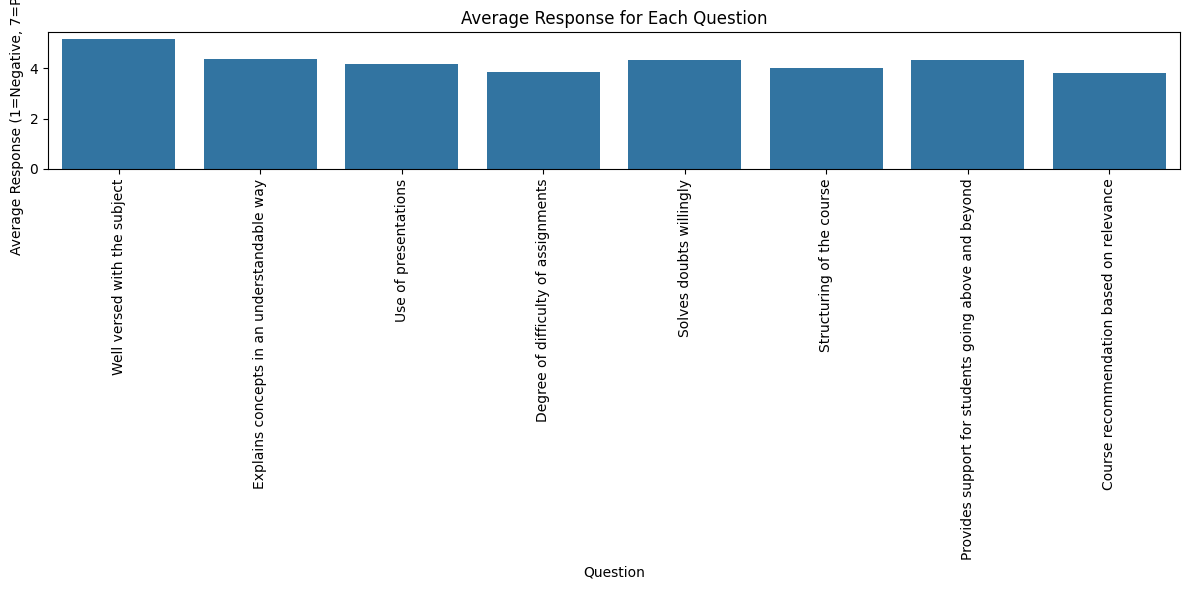

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map categorical responses to numerical values
response_mapping = {
    'Terrible': 1,
    'Very Poor': 1,
    'Poor': 2,
    'Slightly Disagree': 2,
    'Would never recommend': 1,
    'Very unlikey to recommend': 2,
    'Neutral': 3,
    'Okay': 3,
    'Somewhat Disagree': 3,
    'Neutral about recommending': 3,
    'Fair': 4,
    'Somewhat Agree': 4,
    'Slight chance of recommending': 4,
    'Good': 5,
    'Slightly Agree': 5,
    'Likely to recommend': 5,
    'Very Good': 6,
    'Agree': 6,
    'Very likely to recommend': 6,
    'Excellent': 7,
    'Strongly Agree': 7,
    'Perfect': 7,
    'Definitely would recommend': 7,
    'Probably would not recommend': 2 # Assuming 'Probably would not recommend' is closer to 'Very unlikely to recommend'
}

# Apply the mapping to the relevant columns
df_numeric = df.drop('Student ID', axis=1).apply(lambda x: x.map(response_mapping))

# Calculate the average response for each question
average_responses = df_numeric.mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_responses.index, y=average_responses.values)
plt.xticks(rotation=90)
plt.title('Average Response for Each Question')
plt.ylabel('Average Response (1=Negative, 7=Positive)')
plt.xlabel('Question')
plt.tight_layout()
plt.show()

In [7]:
df['Combined_Feedback'] = df.drop('Student ID', axis=1).astype(str).agg(' '.join, axis=1)
display(df.head())

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Combined_Feedback
0,340,Neutral,Disagree,Good,Okay,Strongly Agree,Very Poor,Strongly Disagree,Likely to recommend,Neutral Disagree Good Okay Strongly Agree Very...
1,253,Okay,Neutral,Very Good,Okay,Disagree,Terrible,Disagree,Very likely to recommend,Okay Neutral Very Good Okay Disagree Terrible ...
2,680,Good,Somewhat Agree,Okay,Neutral,Slightly Disagree,Very Poor,Somewhat Disagree,Would never recommend,Good Somewhat Agree Okay Neutral Slightly Disa...
3,806,Excellent,Slightly Agree,Good,Terrible,Neutral,Excellent,Slightly Disagree,Slight chance of recommending,Excellent Slightly Agree Good Terrible Neutral...
4,632,Very Good,Completely Agree,Very Good,Fair,Slightly Agree,Okay,Strongly Agree,Very likely to recommend,Very Good Completely Agree Very Good Fair Slig...


In [9]:
!pip install transformers

In [11]:
from transformers import pipeline

sentiment_analyzer = pipeline('sentiment-analysis')

df['Sentiment_Analysis_Result'] = df['Combined_Feedback'].apply(sentiment_analyzer)

df['Sentiment_Score'] = df['Sentiment_Analysis_Result'].apply(lambda x: x[0]['score'] if x else None)
df['Sentiment_Label'] = df['Sentiment_Analysis_Result'].apply(lambda x: x[0]['label'] if x else None)

display(df[['Combined_Feedback', 'Sentiment_Score', 'Sentiment_Label']].head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,Combined_Feedback,Sentiment_Score,Sentiment_Label
0,Neutral Disagree Good Okay Strongly Agree Very...,0.993341,NEGATIVE
1,Okay Neutral Very Good Okay Disagree Terrible ...,0.956956,POSITIVE
2,Good Somewhat Agree Okay Neutral Slightly Disa...,0.952475,NEGATIVE
3,Excellent Slightly Agree Good Terrible Neutral...,0.993868,POSITIVE
4,Very Good Completely Agree Very Good Fair Slig...,0.999645,POSITIVE


'Descriptive Statistics for Sentiment Score:'

,Sentiment_Score
count,1001.000000
mean,0.941339
std,0.106233
min,0.502475
25%,0.944305
50%,0.990762
75%,0.997717
max,0.999796


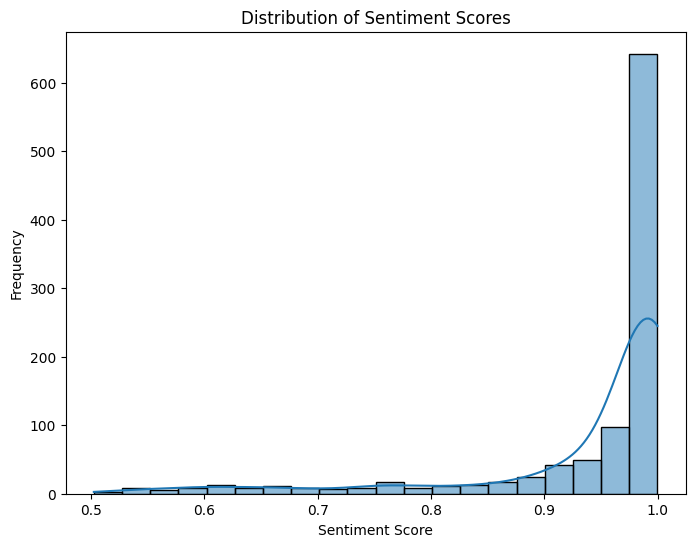

'Counts of Sentiment Labels:'

,count
Sentiment_Label,
POSITIVE,724
NEGATIVE,277


In [13]:
# 1. Calculate and display descriptive statistics for 'Sentiment_Score'
sentiment_score_stats = df['Sentiment_Score'].describe()
display("Descriptive Statistics for Sentiment Score:")
display(sentiment_score_stats)

# 2. Create a histogram of the 'Sentiment_Score' distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Sentiment_Score'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 3. Calculate the counts of each unique value in the 'Sentiment_Label' column
sentiment_label_counts = df['Sentiment_Label'].value_counts()
display("Counts of Sentiment Labels:")
display(sentiment_label_counts)

'Correlation between Sentiment Score and Feedback Questions:'

,0
Well versed with the subject,-0.015425
Explains concepts in an understandable way,0.014396
Use of presentations,0.040366
Degree of difficulty of assignments,0.103884
Solves doubts willingly,0.020062
Structuring of the course,0.127916
Provides support for students going above and beyond,0.039657
Course recommendation based on relevance,0.179772


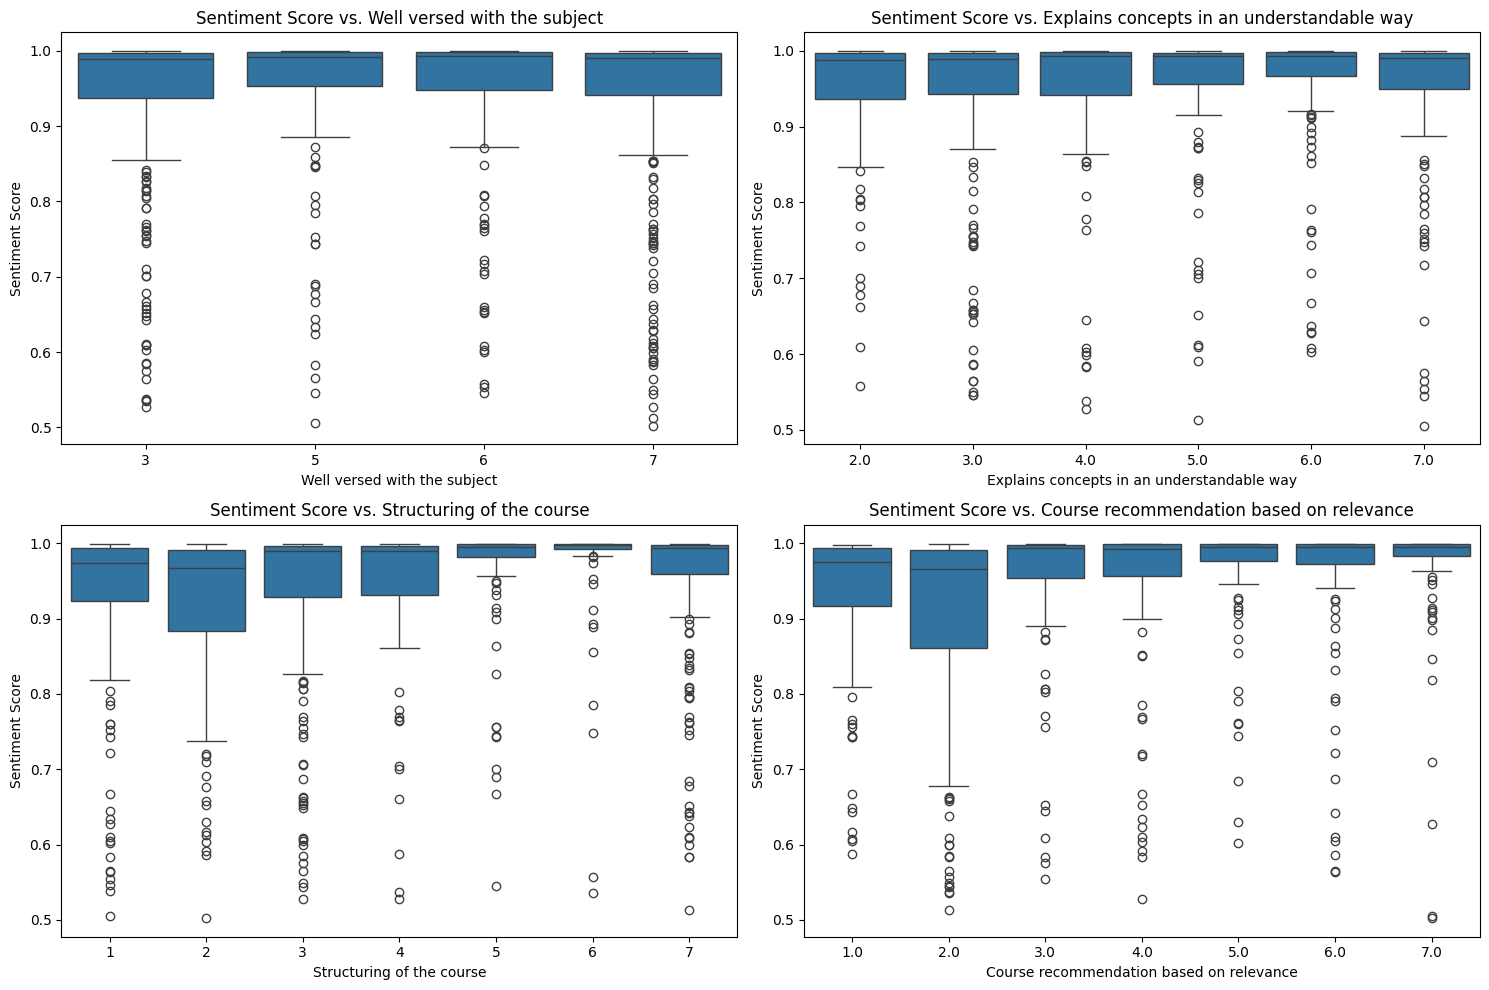

In [15]:
# 4. Explore the relationship between 'Sentiment_Score' and other relevant columns

# Calculate correlation coefficients between Sentiment_Score and numerical feedback columns
correlation_matrix = df_numeric.corrwith(df['Sentiment_Score'])
display("Correlation between Sentiment Score and Feedback Questions:")
display(correlation_matrix)

# Create box plots comparing sentiment scores across different categories in a few selected columns
# Select a few relevant columns from df_numeric for visualization
selected_columns_for_boxplot = ['Well versed with the subject', 'Explains concepts in an understandable way', 'Structuring of the course', 'Course recommendation based on relevance']

plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns_for_boxplot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df_numeric[col], y=df['Sentiment_Score'])
    plt.title(f'Sentiment Score vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The majority of the combined student feedback showed a positive sentiment, with the 'Sentiment\_Label' counts indicating 724 positive entries compared to 277 negative entries.
*   The distribution of sentiment scores was heavily skewed towards positive sentiment, with a mean score of approximately 0.94 and a median of 0.99.
*   Correlation analysis showed weak positive correlations between sentiment score and numerical feedback questions, with the highest correlation observed with "Course recommendation based on relevance" (0.18). Other factors like instructor's subject knowledge and explanation clarity showed negligible correlation.
*   Box plots visually supported the correlation findings, showing a subtle trend of slightly higher sentiment scores associated with higher ratings in feedback categories, although with significant overlap across different rating levels.

